In [1]:
#Quantum Simulation

In [2]:
!pip install qiskit ipywidgets
!pip install pylatexenc

In [2]:
#now that we know how to make gates, we wanna deal with instruction :


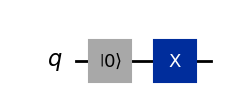

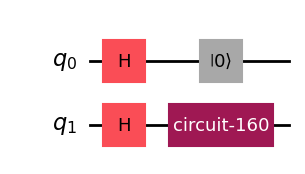

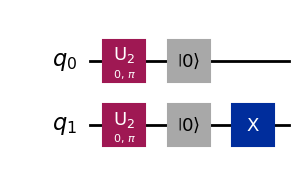

In [4]:
from qiskit import QuantumCircuit
reset_one_qc=QuantumCircuit(1)
reset_one_qc.reset(0)
reset_one_qc.x(0)
display(reset_one_qc.draw('mpl'))
reset_one_inst=reset_one_qc.to_instruction()
qc=QuantumCircuit(2)
qc.h(range(2))
qc.reset(0)
qc.append(reset_one_inst, [1])
display(qc.draw('mpl'))
qc.decompose().draw('mpl')

 the difference between .to_gate(),and .to_istruction():
 to_gate() is for using quantum gates only (just like unitary matrix) (Can't include measurements)
for to_instruction() can also take classical bits as well as quantum gates (it's more comprehensive)
Ex for classical bits: measurements

In [6]:
#Quantum register and classic register

In [7]:
from qiskit import QuantumRegister,ClassicalRegister

#quantumCircuit consist of whole circuit, inclusing its both classical and quantum circuits, but
#for quantum register you can only use quantum gates, not allowed to use any classical component in it
#for classical register, it only has the classical part

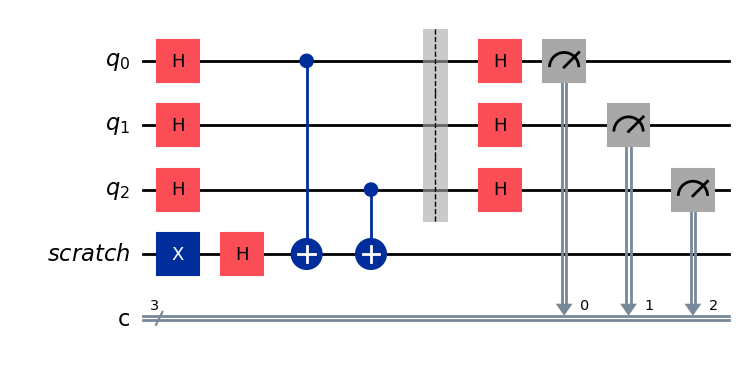

In [8]:
qr=QuantumRegister(3,'q')
scratch=QuantumRegister(1,'scratch')
cr=ClassicalRegister(3,'c')
qc=QuantumCircuit(qr,scratch,cr)
qc.h(qr)
qc.x(scratch)
qc.h(scratch)
qc.cx(qr[0],scratch)
qc.cx(qr[2],scratch)
qc.barrier(qr)
qc.h(qr)
qc.measure(qr,cr)
qc.draw('mpl')

choosing qr as QuantumRegister for 3, it automatically put q0,q1,q2 for us in order
the scratch is ancilla qubit 
register are our qbits, just like classical computers that we call number of classical bits as our registers
here we call all of our classical bits as classical register and our qubits as quantum register
 we can call seperately the ancilla register if we have multiple of ancilla

In [10]:
#Triggering the circuit and make it mutable:
# qiskit.circuit.library, to see the source code, google it
from qiskit.circuit.library import CCXGate # qc.ccx, this is the Toffoli gate, 
toffoli=CCXGate()
print(toffoli.num_ctrl_qubits)
    
#toffoli.num_ctrl_qubits gives us the number of control qubits for toffoli gate 

2


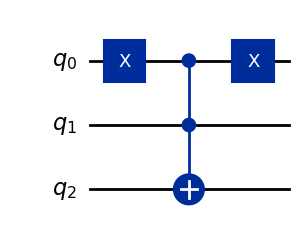

In [11]:
#now make change to toffoli gate
#mutable: when we wanna make change to the gate

toffoli_mutable=toffoli.to_mutable()

#after making it mutable, we should mention what exactly we want to be mutable

toffoli_mutable.ctrl_state=2   # if it checks the binary of two, will trigger it

# for showing this circuit, that we didn't define the circuit, rather we introduced the gates we need to use
#.definition to draw it

toffoli_mutable.definition.draw('mpl')

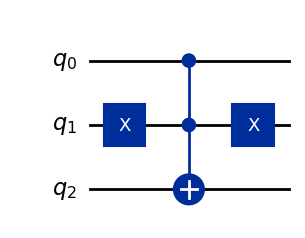

In [12]:
#if we change the trigger, it would look different as such:
toffoli_mutable=toffoli.to_mutable()

#after making it mutable, we should mention what exactly we want to be mutable

toffoli_mutable.ctrl_state=1   # if it checks the binary of two, will trigger it

# for showing this circuit, that we didn't define the circuit, rather we introduced the gates we need to use
#.definition to draw it

toffoli_mutable.definition.draw('mpl')

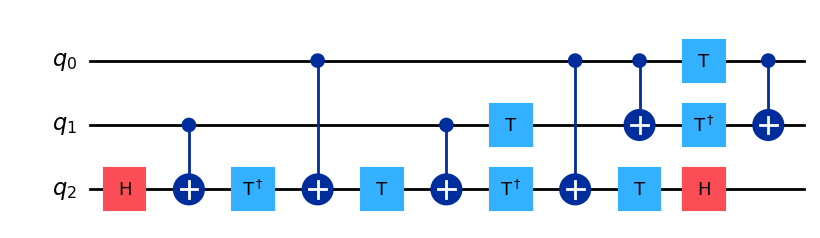

In [13]:
toffoli_mutable=toffoli.to_mutable()

#after making it mutable, we should mention what exactly we want to be mutable

toffoli_mutable.ctrl_state=3   # if it checks the binary of two, will trigger it

# for showing this circuit, that we didn't define the circuit, rather we introduced the gates we need to use
#.definition to draw it

toffoli_mutable.definition.draw('mpl')

In [14]:
# for toffoli_mutable.ctrl_state=3 , it is not working properly

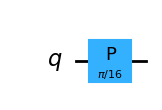

In [15]:
from math import pi
p16_qc=QuantumCircuit(1)
p16_qc.p(pi/16,0)
p16_gate=p16_qc.to_gate()
p16_gate.definition.draw('mpl')

In [16]:
# when dealing with definition, we have a box with information, of operating P for pi/16 rotation

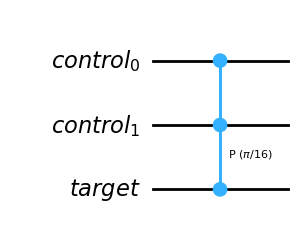

In [17]:
ctrl_p16=p16_gate.control(2)  # we can have two controls as our input, # of controls = input
ctrl_p16.definition.draw('mpl') # for phase, there is no difference between controller and target

for phase, there is no difference between controller and target, it also has two controls, control0 and control1 here

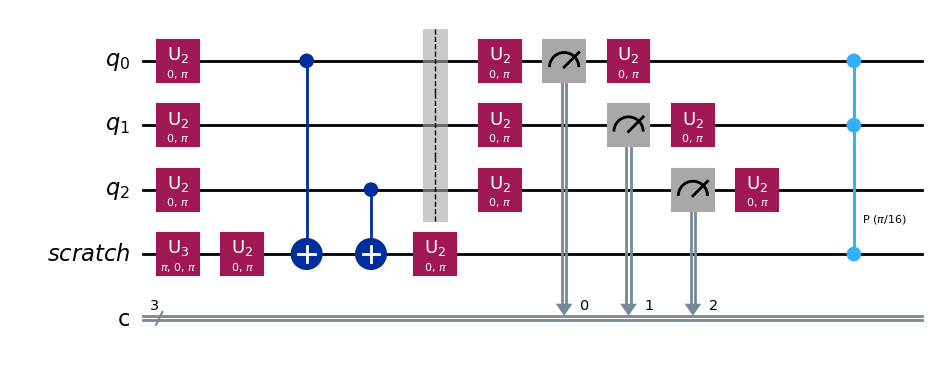

In [19]:
#now defining a quantum circuit:
qc.h(range(4))
qc.append(ctrl_p16,[0,1,3])

qc.decompose().draw('mpl') #can't use definition when using append

In [20]:
#variational quantum gates:
#dealing with parameter vectors
from qiskit.circuit import ParameterVector
theta=ParameterVector('theta',3)
print(theta)  # before this, we had to definie theta0, thata1, theta2 seperately, but now we can define a vector

theta, ['theta[0]', 'theta[1]', 'theta[2]']


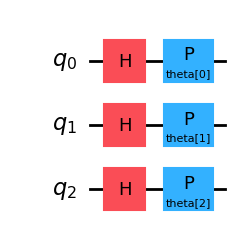

In [21]:
qc=QuantumCircuit(3)
qc.h(range(3))
for i in range(3):
    qc.p(theta[i],i)
qc.draw('mpl')

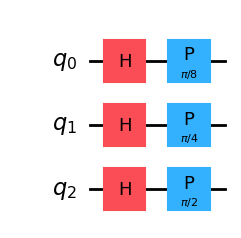

In [22]:
# bind, or assign:
b_qc=qc.assign_parameters({theta:[
    pi/8,
    pi/4,
    pi/2
]})
b_qc.draw('mpl')

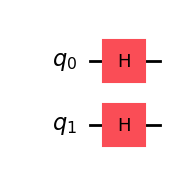

<IPython.core.display.Latex object>

In [23]:
#For quantum Simulation: first import libraries like .quantum_info
from qiskit.quantum_info import Statevector # for Bloch representation, we need statevector
from qiskit.visualization import latex # for observing the kets and their probability domain

#observing how quantum visualization works:
qc=QuantumCircuit(2)
qc.h(range(2))
display(qc.draw('mpl'))
state=Statevector.from_instruction(qc) #using .from_instruction(), we can get statevector
state.draw('latex') #state.draw() to see the statevector


# using the class of quantum_info, it is not a simulator, but acts with usage of linear algebra
#so, if we have measurement somewhere, or classical bits, the quantum_info library can't do the job, so we would: 
#need to use the quantum simulator
#when using .from-instruction() it somehow measures to find statevector, using linear Algebra instead of Simulator
# sowing statevector using command line: state.draw('latex')

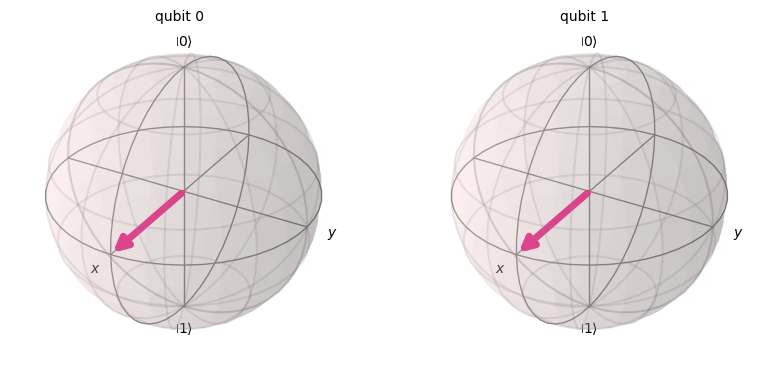

In [24]:
state.draw('Bloch')

In [25]:
#plot and visualization:
from qiskit.visualization import plot_histogram
# for finding histogram, we need to have the probabilities first
probs=state.probabilities()
print(probs)

[0.25 0.25 0.25 0.25]


In [26]:
#we can also find number of probs as counts, without using simulator, we can find probabilities using quantum.info()

counts=state.sample_counts(shots=1024) # should specify the number of shots
print(counts)

{'00': 261, '01': 258, '10': 274, '11': 231}


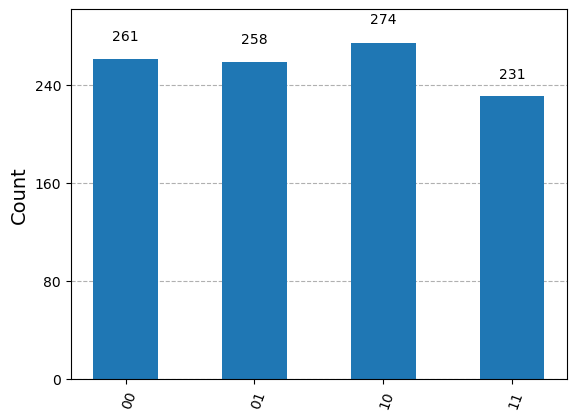

In [27]:
#using the probs and counts, we can get the histogram
#all probabilities are 1/4 since we applied hadamard gate
#for counts, it defines a dictionary, Ex: for key 00,it was observed 267 times and so on 
# now doing the plot histogram
plot_histogram(counts)

In [28]:
#now that we have counts, we wanna observe that what the circuit resulted each time (no similator here, only Linear Algebra)
#using .sample_memory()
samples=state.sample_memory(shots=10)
print(samples)

['10' '00' '11' '10' '01' '10' '11' '00' '11' '00']


the results given are probabilistic, similator also gives the same results with get_counts and get_meomory as
quantum info gives results , here for quantum info, we give our circuit to statevector_instruction
then on the state, we aplied sample_counts and sample_memory 
for quantum_info, when ddefine gates, we couldn't have such things we see below:

In [30]:
import qiskit.quantum_info as qi

Operator=qi.SparsePauliOp(['ZZ','XX','II'],[0.2,-0.3,0.4])#getting first list of gates, we wanna made unitary, 
# second list is weight of gates
full_operator=Operator.to_operator() # using the command .to_operator() to make it an operator

full_operator.draw('latex')

<IPython.core.display.Latex object>

we made such correspondace: 0.2(z@z)+(-0.3)(x@x)+0,4(I@I) @=tensor product here
here we have a unitary matrix, that ZZ was applied to 2 qubits,with 0.2 probability, and XX was aplied with 0.3 
as our probability, and II doesn't weigh in since it's a unitary operator

finding expectationvalue using quantum_info
for a pure state /psi> : <O>=<psi/O/psi> for expectation value of an operator
Now, if we had a mixed state,that is represented by a density matrix rho, the expectation value of the operator, 
is the trace of the density matrix of circuit multiplied by operator itself : <O>=Tr(rhoO)

In [32]:
#having our initial state, defined beforehand as state 1/2|00⟩+1/2|01⟩+1/2|10⟩+1/2|11⟩
#using the command .expectation_value(),using the opeerator we defined above in the parantheses
expectation_value=state.expectation_value(Operator)
print(expectation_value)

(0.10000000000000003+0j)


In [33]:
#the expectation value is 0.1 ( the other digits are for python error)

In [34]:
#Finding the density matrix of our circuit:
#if having a mixed state, we can't have psi ket, but we need a density matrix to define it:
rho=qi.DensityMatrix(qc)
rho.draw('latex')

<IPython.core.display.Latex object>

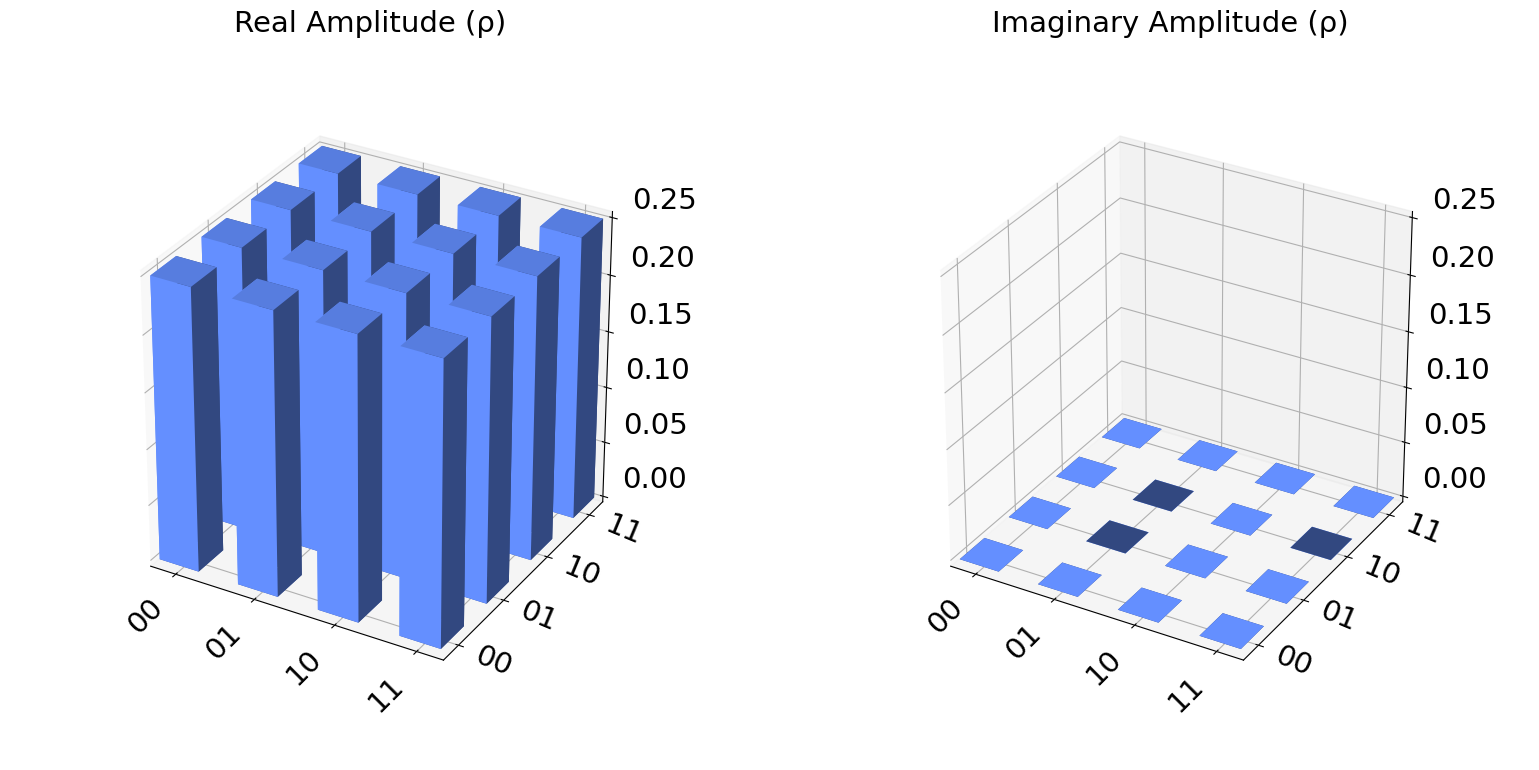

In [35]:
#since we applied hadamard, this is our matrix density
# 'city' density, shows imaginary and real values of our density matrix using the rho.draw('city')
rho.draw('city')

since we didn't have any imaginary values,imaginary amplitude for all of them is zero

partial Trace
if we have the density matrix of two qubits(AB), by taking partial trace with respect to A,you have density matrix of B
rho(B)=Trace(rho(AB)) impliment it, using command: .partial_trace(density matrix, the qubit taking derivative wrt)

In [38]:
rho1= qi.partial_trace(rho,[0]) #[0] showing to get derivative with respect to first qubit(A)
rho1.draw('latex') # now getting the density matrix of second qubit (qubit B)

<IPython.core.display.Latex object>

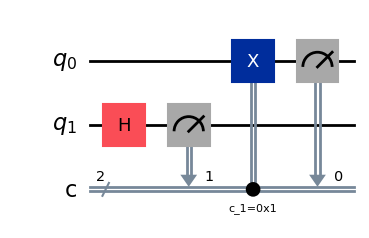

In [39]:
#Now defining the quantum circuit with 2 classical bits,
#dealing with mixed circuit measurement that quantum_info can't handle
qc=QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)# here having quantum circuit measuring it's qubit 1 on classical bit 1,
qc.x(0).c_if(1,1) #.c_if(,), since we applied hadamard on qubit 1,it could be 0 or 1, if it was 1, apply
#c_if(,), the first entry shows on which qubit we apply it, the second entry, telling you what you observe to be acted
#first entry is target, second entry is control in c_if(,)
# we measure qubit1 first, then looking at classical bit 1 after measurement(it could be 0 or 1 since using hadamard)
# if it was 1, apply x on qubit 0
qc.measure(0,0) #now doing measurement on second qubit
#  we can display our circuit,but can't find it's statevector since we have circuit measurement, since it's not compatible with linear Algebra
display(qc.draw('mpl'))

#display our circuit with no issue

above here, we have aplied hadamard, on qubit1, then doing the measurement, in case we get value 1, then wwe would
apply NOT gate on our qubit zero, then we measure qubit0 , having the classical control wouldn't cause issue
and that's also what is used on HHL

In [41]:
# it would give error, can not apply instruction, meaning it can't give result with linear algebra and probability
#it'sthe limitation of quantum_info
qi.Statevector(qc)

QiskitError: 'Cannot apply instruction with classical bits: measure'

Error reason:'Cannot apply instruction with classical bits: measure'
the limitation of quantum_info()is that when there is a measurement involved, it couldn't get the job done, so
we have to deal with simulator

Matrix density, is an outer product of state and operator, added up, 
the command for it: qi.DensityMatrix(qc)

#the simulator Basic Aer, is turned to Basic Simulator in qiskit new version, 
#now the limitation is 50 qubits now

In [45]:
#getting the Basic Simulator in qiskit:
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic= BasicSimulator() # we instantiate the basic simulator we called beforehand

#for running the circuit we had,we define job, then run it using .run(first argument is the circuit,
# second argument is the number of repetition)

job=simulator_basic.run(qc, shots=1024)

#define a result, using .result()
result=job.result()
print(result)

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='52102636-d0bb-419d-954e-bbfc24ca06fa', job_id='56660c41-ea0d-4811-9d9f-a9c00e8fc301', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 522, '0x0': 502}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1]], n_qubits=2, qreg_sizes=[['q', 2]], clbit_labels=[['c', 0], ['c', 1]], memory_slots=2, creg_sizes=[['c', 2]], name='circuit-185', global_phase=0.0, metadata={}), status=DONE, name='circuit-185', seed_simulator=1412170357, time_taken=0.058945655822753906)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.058960676193237305)


In [46]:
#this is not something understandable, but can find more using commands we have
# using .get_counts(), we would get number of results for each output, which it defines as a dictionary
counts=result.get_counts()
print(counts)

#what do we expect to see as ouput of coodes above? 00, 11, when using hadamard, if first one is 1, the other one
# is also 1, but when first one is zero, the other one also stays as zero


{'11': 522, '00': 502}


In [47]:
#the output, 514 times 11, and 510 times 00 was obtained

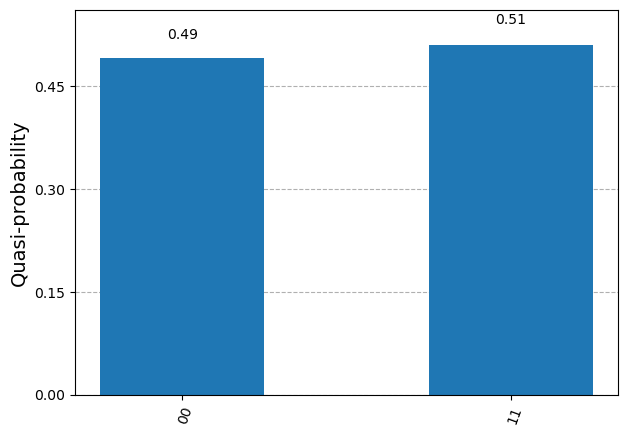

In [48]:
#Visulaization
# plot_distribution, it is quasi probability that is being showed

from qiskit.visualization import plot_distribution
plot_distribution(counts)


this is showing 514/1024, 510/1024, only ratios are showen in quasi_distribution

In [50]:
#we used  sample_memory() to get the output in quantum_info(), now how we can get it here:
job=simulator_basic.run(qc, shots=10, memory=True) #decrease the number of shots, since we're about to show results
#include memory=True as well here
result=job.result()  #getting the result using .result()
samples=result.get_memory()
print(samples)

# in the previous section, it was same story, having shots, and circuit, now we only include memory=True, so that 
# it would remember the memory, that when we want to put results in samples, using .get_memory,instead of the 
#quantum_info command as of sample_memory(), we use here .get_memory()


['00', '11', '11', '00', '11', '00', '11', '00', '11', '11']


#when there is no noise, we expect to see 00, and 11 reandomly distributed to be observed, since shots=10, only get 10 of them here

Simulators have transpile ( having a box in circuit, first transpile it, then give it to Simulator)

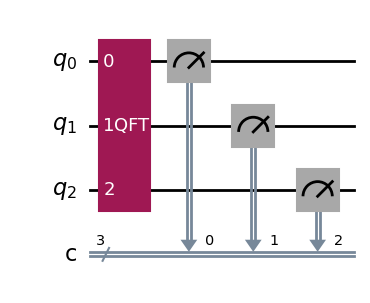

In [53]:
from qiskit.circuit.library import QFT # using ready to use quantum fourier transform for the transpile purpose,sinc
# it will have a box
qc=QuantumCircuit(3,3) #since we have measurement, wwe need simulator
qc.append(QFT(3),range(3)) #QFT(specify the number of qubits that we want QFT to be applied on,)

#QFT:Quantum fourier transform
#transpile with backend of basic_simulaor differs from the backend of aer usually, but it might happen to be the same
#range() specifies the number of classical bits that we have
qc.measure(range(3),range(3)) 
qc.draw('mpl')

In [54]:
# it could be observed that in this circuit, we have a box in it for QFT, that we can't give it in this way to 
#simulator, since it can't be executed with this box
job=simulator_basic.run(qc, shots=1024)

BasicProviderError: 'basic_simulator encountered unrecognized operation "QFT"'

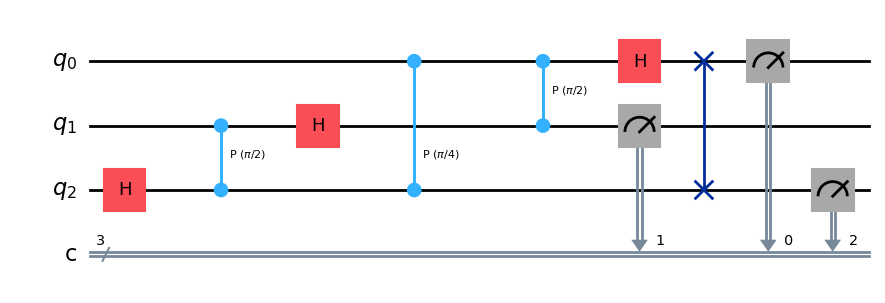

In [55]:
#'basic_simulator encountered unrecognized opertion "QFT"'
#So we need a transpile to make it work to avoid this error
from qiskit import transpile
transpiled_qc=transpile(qc, backend=simulator_basic) # need to specify the backend we want, 
display(transpiled_qc.draw('mpl'))
#ttranspile the box, to things that basic simulator can understand easily
#the goal was to transpile the circuit to elements that simulator can understand

In [56]:
#run and get the number of counts by putting the run of the simulator to the job
job=simulator_basic.run(transpiled_qc,shots=1024)
result=job.result()
counts=result.get_counts()
print(counts)

{'100': 137, '110': 113, '001': 112, '111': 134, '000': 128, '010': 132, '101': 129, '011': 139}


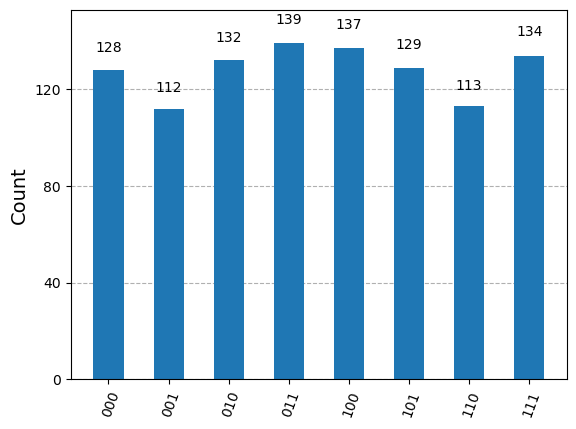

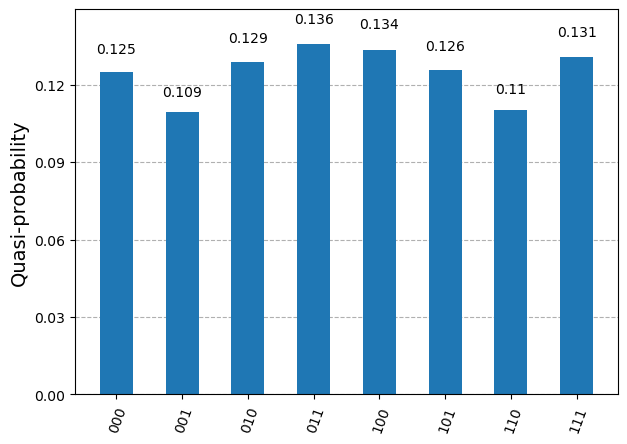

In [57]:
#can do the plotting
display(plot_histogram(counts))
display(plot_distribution(counts))

having histogram showing frequency, and quasi-probability with plot_distribution

In [59]:
!pip install qiskit-aer

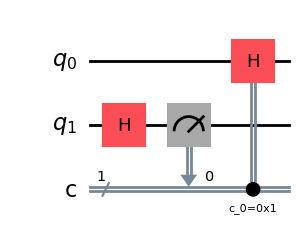

In [60]:
#having a circuit measurement with circuit
#both basic_simulator and Aer, can't give the statevector projection to us
#This could be observed here:
qc=QuantumCircuit(2,1)
qc.h(1)
qc.measure(1,0)
qc.h(0).c_if(0,1)
#hadamard being applied to the qubit zero, with the condition (if, or using the controller applied to classical bit
#with the condition on applying bit zero, when it observed 1 
# having qc.h(qubit).c_if(classical bit, control qubit)
qc.draw('mpl')

In [61]:
qc_basic=transpile(qc,backend=simulator_basic)
#Can wotk with transpile, whether it asks for it or not, using backend for basic_simulator, getting result with run
result=simulator_basic.run(qc_basic,shots=1024).result() # do commands without using job, now do it right straight
counts=result.get_counts()
print(counts)

{'0': 511, '1': 513}


Now, it could be seen that the output is as it could be observed, since we had one measurement, 
if there was no measurement involved,it wouldn't show anything, so for simulator, 
#so, it is important to include measurements


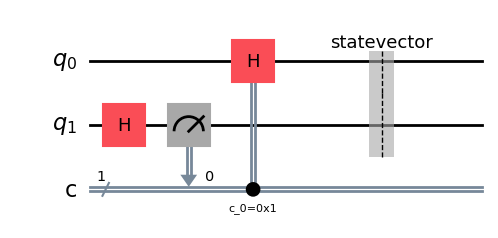

In [68]:
from qiskit_aer import AerSimulator
#WE're using a differnt library, it's not qiskit anymore
#Now including Aersimulator to simulator_aer
simulator_aer=AerSimulator()
qc=QuantumCircuit(2,1)
qc.h(1)
qc.measure(1,0)
qc.h(0).c_if(0,1)
qc.save_statevector() #using .save_statevector() to get the statevector, this is something basic_simulator can't do
qc.draw('mpl')

In [71]:
#now having statevector, we can run this, using for to run it multiple times:
for i in range(6):
    qc_aer=transpile(qc, backend=simulator_aer)  #using backend of simulator_aer rather rhan simulator_basic
    result=simulator_aer.run(qc_aer).result()
    psi=result.get_statevector() # using command get_statevector will give us statevector
    display(psi.draw('latex')) # since we have iteration, it's gonna be run multiple times, so I need display()
#using latex since we wanna see statevector

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [72]:
# if we run it multiple times, the result of above code is different (the result is random)
# simulator_basic doesn't have this ability as shown below:
qc_basic=transpile(qc,backend=simulator_basic)
result=simulator_basic.run(qc_basic).result()
psi=result.get_statevector()
psi.draw('latex')

TranspilerError: "Unable to translate the operations in the circuit: ['h', 'measure', 'cx', 'save_statevector', 'barrier'] to the backend's (or manually specified) target basis: ['id', 'z', 'rzx', 'unitary', 'rz', 'cy', 'dcx', 'ch', 'r', 'csx', 'cu3', 'rxx', 'reset', 'cry', 'u3', 'barrier', 'store', 'sx', 'xx_minus_yy', 'crx', 'h', 'measure', 't', 'p', 'crz', 'delay', 'x', 'cs', 'cu', 'cx', 'sdg', 'snapshot', 'ccx', 'global_phase', 'ryy', 'swap', 'ccz', 'cz', 'rccx', 'cu1', 'iswap', 'rx', 'y', 'rzz', 's', 'xx_plus_yy', 'cp', 'u2', 'sxdg', 'ry', 'cswap', 'u1', 'csdg', 'tdg', 'ecr', 'u']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.BasisTranslator#translation-errors"

The benefit of simulator_aer over simulator_basic is that it could give us statevector


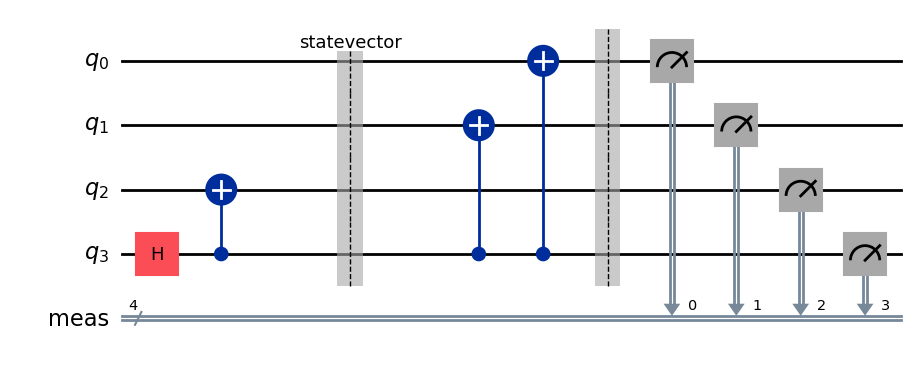

In [70]:
#let's see how does it work on a bigger circuit:
qc=QuantumCircuit(4)
qc.h(3)
qc.cx(3,2)
qc.save_statevector()
qc.cx(3,1)
qc.cx(3,0)
qc.measure_all()
qc.draw('mpl')

This circuit, without the statevector part is the "G1Z" circuit, wanna get staevector midway with such a method

our expectation is that the place that G1Z has barrier, we have 4 qubits, so we expect to see 4 ones and 4 zeros
with 1/2 as probability (sqrt(2)/2)
however,having statevector barrier, 

In [74]:
qc_aer=transpile(qc, backend=simulator_aer)  #using backend of simulator_aer rather rhan simulator_basic
result=simulator_aer.run(qc_aer).result()
psi=result.get_statevector() # using command get_statevector will give us statevector
display(psi.draw('latex'))

<IPython.core.display.Latex object>

Mid way the probability of 0000 and 1100 is the same

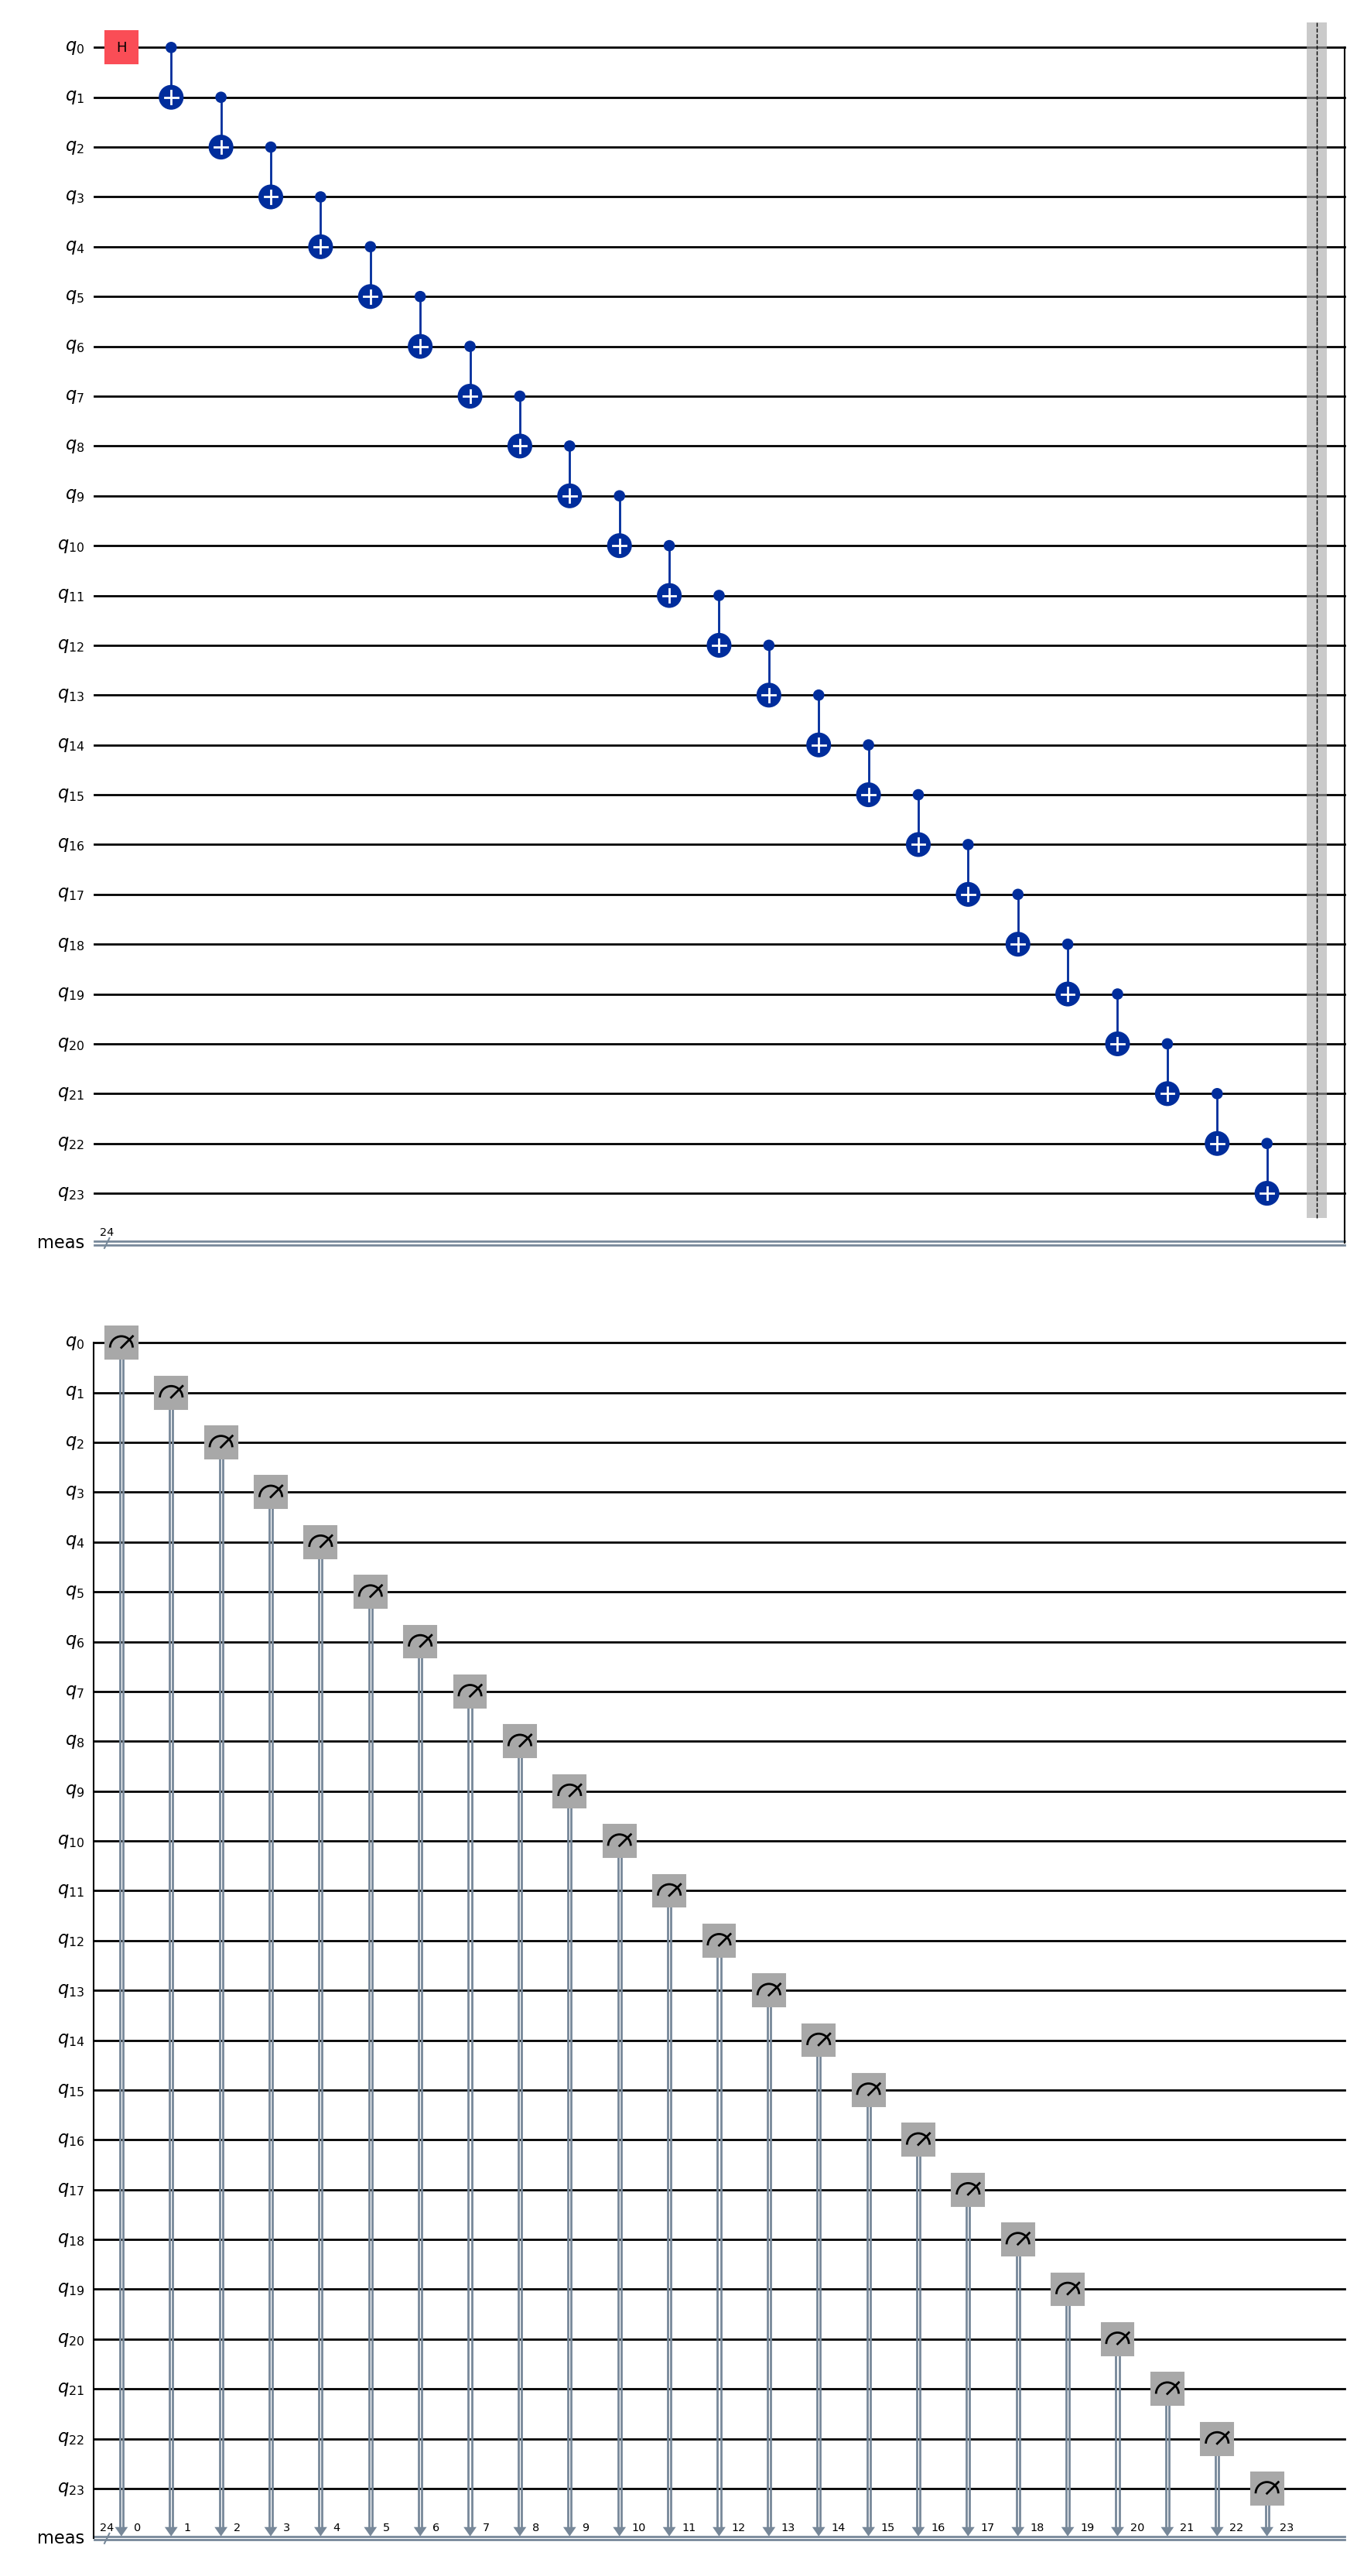

In [77]:
#Trying to see efficiency of Aer_simulator, making G1Z :
# having n=50 is possible with basic simulator,
# having quantum circuit with n qubit, applying hadamard on qubit 0, then aplying cnot
n=24
qc=QuantumCircuit(n)
qc.h(0)
for i in range(n-1):
    qc.cx(i,i+1) # i is control, #having consecutive cnot on each
    
qc.measure_all()  #measure_all
qc.draw('mpl')

since the circuit is too big, when it s being shown,it is devided into two circuits

In [ ]:
# the time it takes to run only for colab using command : %%time , comparing for Aer_simulator, and basic_simulator
%%time
result=simulator_basic.run(qc,shots=1024).result()
counts=result.get_counts()
print(counts)

In [ ]:
%%time
result=simulator_aer.run(qc,shots=1024).result()
counts=result.get_counts()
print(counts)

Aer_simulator much faster on google colab

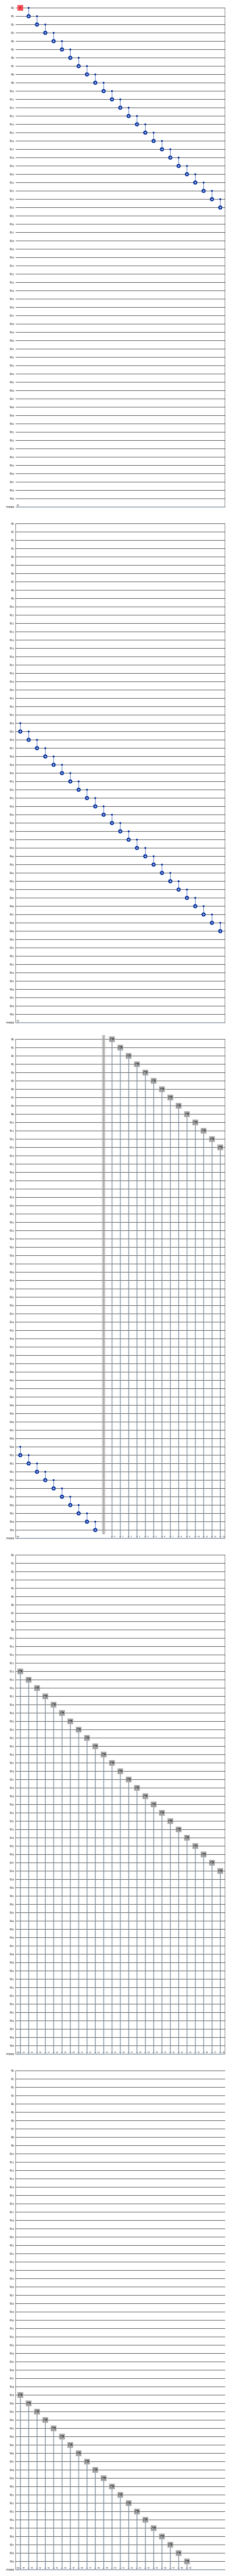

In [81]:
#Trying to see efficiency of  Aer_simulator, making G1Z :
# having n=50 is possible with basic simulator,
# having quantum circuit with n qubit, applying hadamard on qubit 0, then aplying cnot
n=60
qc=QuantumCircuit(n)
qc.h(0)
for i in range(n-1):
    qc.cx(i,i+1) # i is control, #having consecutive cnot on each
    
qc.measure_all()  #measure_all
qc.draw('mpl')

basic_simulator is n=24, but Aer can do even 50 or more

how they made Aer better than basic using the backend in unknown to us now, but for developing Aer, C was used